In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

from LSSVM import predict, lssvmMatrix, prepareLabels, accuracy


In [5]:
gamma = 0.01 # regularization parameter
testSize = 0.2

LS-SVM Matrix: [[ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.09256230e+02 -3.33994575e+00 ... -2.85908373e+00
   3.94006012e-02 -6.07068684e-01]
 [ 1.00000000e+00 -3.33994575e+00  1.01233536e+02 ...  1.28590519e+00
   2.72769442e-01 -1.35649909e-01]
 ...
 [ 1.00000000e+00 -2.85908373e+00  1.28590519e+00 ...  1.03161318e+02
   2.55930321e+00 -2.99069024e+00]
 [ 1.00000000e+00  3.94006012e-02  2.72769442e-01 ...  2.55930321e+00
   1.02902670e+02 -3.58992127e+00]
 [ 1.00000000e+00 -6.07068684e-01 -1.35649909e-01 ... -2.99069024e+00
  -3.58992127e+00  1.04473571e+02]]
[ 0 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1
 -1  1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1]
Solution: [ 0.09200202 -0.00629278  0.00708995 -0.00793156  0.00680121  0.00707758
 -0.00966752 -0.00698345  0.00772288 -0.00746978  0.01065457  0.00996635
  0.00694141  0.00696572  0.00605406  0.00564314 -0.01008589 -0.010

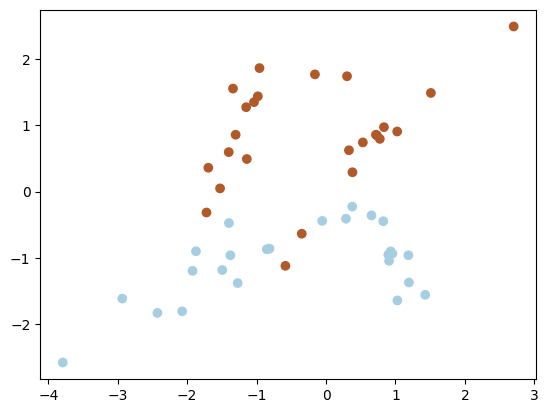

In [6]:
X, y = datasets.make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)


lssvmMatrix1 = lssvmMatrix(X_train, gamma, "linearKernel")
yVector = prepareLabels(y_train)
print("LS-SVM Matrix:", lssvmMatrix1)
print(yVector)

solution = np.linalg.solve(lssvmMatrix1, yVector)
print("Solution:", solution)

bias = solution[0]
weights = solution[1:]

predictions = predict(X_train, X_test, weights, bias)
print("Predictions:", predictions)

print("Accuracy:", accuracy(y_test, predictions))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()